<a href="https://colab.research.google.com/github/AndrijaTasic/PPPO_IT9_2018/blob/main/PPPO_IT9_2018_Andrija_Tasic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Student**: Andrija Tasić IT9/2018 <br>
**Predmet**: Principi prezentacije i prepoznavanje oblika <br>
**Tema projektnog zadatka**: Detekcija godina, pola i emocija <br>

Duboko učenje je pronašlo ogromnu primenu u oblastima kompjuterske vizije (Computer vision - CV). Neke od najvažnijih primena kompjuterske vizije su u oblastima koje se bave podacima o licu. Prepoznavanje i detekcija lica se široko koriste u aplikacijama zasnovanim na bezbednosti.

Kompjuterska vizija (Computer vision - CV) je polje veštačke inteligencije koje obučava računare da tumače i razumeju vizuelni svet. Koristeći digitalne slike sa kamera i video zapisa i modele dubokog učenja, mašine mogu precizno da identifikuju i klasifikuju objekte — a zatim reaguju na ono što „vide“.

Za samu izradu projekta, biće korišćeni predefinisani modeli upotrebom Transfer Learning-a, odnosno tehnike gde se pre-trained modeli prilagođavaju zadatku zamenom poslednjeg layer-a, kako bi odgovarao broju kategorija koje su moguće za dati dataset. Kao modeli, na osnovu prethodno pokazanih dobrih iskustava za rešavanje sličnih problema klasifikacije, izabrani su CNN (Convolutional Neural Network) modeli VGG16 i ResNet50.

# Učitavanje i pregled podataka

Najpre je potrebno učitati dataset, koji sadrži slike koje će kasnije biti korišćene za trening i validaciju odnosno testiranje. Podaci su podeljeni u pet foldera od kojih svaki predstavlja folder sa slikama određene poznate ličnosti. 
Ličnosti čije ćemo slike koristiti su:

- Ben Aflek
- Elton John
- Jerry Seinfeld
- Madonna
- Mindy Kaling

In [153]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1vIyvXtTerVUWVuRRPGcFgXTkgUgM-d9U' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1vIyvXtTerVUWVuRRPGcFgXTkgUgM-d9U" -O images.zip && rm -rf /tmp/cookies.txt

--2022-09-26 21:45:20--  https://docs.google.com/uc?export=download&confirm=&id=1vIyvXtTerVUWVuRRPGcFgXTkgUgM-d9U
Resolving docs.google.com (docs.google.com)... 74.125.31.138, 74.125.31.101, 74.125.31.102, ...
Connecting to docs.google.com (docs.google.com)|74.125.31.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-00-64-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/1pp04k4ral49j2rdlaa2ceoffi5gg9k5/1664228700000/06049624160957438625/*/1vIyvXtTerVUWVuRRPGcFgXTkgUgM-d9U?e=download&uuid=6c8ea35c-b10f-4775-bc4c-e1ab326e50ff [following]
--2022-09-26 21:45:20--  https://doc-00-64-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/1pp04k4ral49j2rdlaa2ceoffi5gg9k5/1664228700000/06049624160957438625/*/1vIyvXtTerVUWVuRRPGcFgXTkgUgM-d9U?e=download&uuid=6c8ea35c-b10f-4775-bc4c-e1ab326e50ff
Resolving doc-00-64-docs.googleusercontent.com (doc-00-64-docs.googleusercontent.com)... 74.125.196.132, 2607:

In [154]:
!unzip images.zip

Archive:  images.zip
replace data/train/ben_afflek/httpcsvkmeuaeccjpg.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


Nakon što su podaci učitani i raspakovani, primećeno je da uz dataset ne postoji nijedan .csv fajl u kome bi se nalazile informacije o godinama, polu, emocijama na datim slikama, tako da je potrebno ručno kreirati .csv fajl sa određenim podacima za dalje treniranje i validaciju. 

Nije lako odrediti godine ličnostima sa slika, tako da će i ovde podaci biti približni, samim tim krajnji rezultati će u određenoj meri biti lošiji zbog toga.

In [155]:
import numpy as np
import matplotlib.pylab as plt
import os
import pandas as pd

In [156]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://drive.google.com/file/d/19ti0BkjwkLhEYfLF2sXm9715_xhJk033/view?usp=sharing' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=11mztijLWMV1NfPusiOyY6dPMy87bp2Rp" -O pppo_labels_train.csv && rm -rf /tmp/cookies.txt

--2022-09-26 21:45:28--  https://docs.google.com/uc?export=download&confirm=&id=11mztijLWMV1NfPusiOyY6dPMy87bp2Rp
Resolving docs.google.com (docs.google.com)... 74.125.31.138, 74.125.31.101, 74.125.31.102, ...
Connecting to docs.google.com (docs.google.com)|74.125.31.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0s-a8-docs.googleusercontent.com/docs/securesc/q9os3rf3r30gvc1n5o6m6fqd5k33v1il/qqlvgdql7cvf7bt2peflg4cako5l1i39/1664228700000/08973908389887696716/06469071510000829808Z/11mztijLWMV1NfPusiOyY6dPMy87bp2Rp?e=download&uuid=ae647cfc-f4a8-4e90-8e78-d2de4b714cf5 [following]
--2022-09-26 21:45:28--  https://doc-0s-a8-docs.googleusercontent.com/docs/securesc/q9os3rf3r30gvc1n5o6m6fqd5k33v1il/qqlvgdql7cvf7bt2peflg4cako5l1i39/1664228700000/08973908389887696716/06469071510000829808Z/11mztijLWMV1NfPusiOyY6dPMy87bp2Rp?e=download&uuid=ae647cfc-f4a8-4e90-8e78-d2de4b714cf5
Resolving doc-0s-a8-docs.googleusercontent.com (doc-0s-a8-docs.googleu

In [157]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1r6QTjIqFuaijI1Xuh7Jn3ySHOKLuGNU2' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1r6QTjIqFuaijI1Xuh7Jn3ySHOKLuGNU2" -O pppo_labels_val.csv && rm -rf /tmp/cookies.txt

--2022-09-26 21:45:29--  https://docs.google.com/uc?export=download&confirm=&id=1r6QTjIqFuaijI1Xuh7Jn3ySHOKLuGNU2
Resolving docs.google.com (docs.google.com)... 74.125.31.138, 74.125.31.101, 74.125.31.102, ...
Connecting to docs.google.com (docs.google.com)|74.125.31.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-bs-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/5a4l3qd5akvih40h23phebdvhk16a1p2/1664228700000/08973908389887696716/*/1r6QTjIqFuaijI1Xuh7Jn3ySHOKLuGNU2?e=download&uuid=a2c6e88b-8368-4069-b84f-edde98d36316 [following]
--2022-09-26 21:45:29--  https://doc-0k-bs-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/5a4l3qd5akvih40h23phebdvhk16a1p2/1664228700000/08973908389887696716/*/1r6QTjIqFuaijI1Xuh7Jn3ySHOKLuGNU2?e=download&uuid=a2c6e88b-8368-4069-b84f-edde98d36316
Resolving doc-0k-bs-docs.googleusercontent.com (doc-0k-bs-docs.googleusercontent.com)... 74.125.196.132, 2607:

In [158]:
train_data = pd.read_csv('pppo_labels_train.csv')
train_data.head()

,image_path,gender,age,emotion
0,/content/data/train/ben_afflek/httpcsvkmeuaecc...,0,1,3
1,/content/data/train/ben_afflek/httpimagesfanda...,0,2,4
2,/content/data/train/ben_afflek/httpssmediacach...,0,2,6
3,/content/data/train/ben_afflek/httpssmediacach...,0,1,6
4,/content/data/train/ben_afflek/httpssmediacach...,0,2,3


In [159]:
print("Broj slika za treniranje:")
len(train_data)

Broj slika za treniranje:


93

In [160]:
val_data = pd.read_csv('pppo_labels_val.csv')
val_data.head()

,image_path,gender,age,emotion
0,/content/data/val/ben_afflek/httpabsolumentgra...,0,0,0
1,/content/data/val/ben_afflek/httpafilesbiograp...,0,2,4
2,/content/data/val/ben_afflek/httpbpblogspotcom...,0,2,4
3,/content/data/val/ben_afflek/httpcsvkmeuaafdfj...,0,1,6
4,/content/data/val/ben_afflek/httpcsvkmeuadecaf...,0,2,4


In [161]:
print("Broj slika za validaciju:")
len(val_data)

Broj slika za validaciju:


25

Naš dataset ima svega 93 slike za treniranje i 25 slika za validaciju, što takođe predstavlja jedan od problema, s obzirom da je taj broj veoma mali.

Na naredna tri grafika će biti prikazani podaci za treniranje na osnovu pola, godina i emocija.

Može se primetiti da na se na slikama nalazi veći broj osoba muškog pola. Muškarci će biti označeni 0, a žene brojem 1.

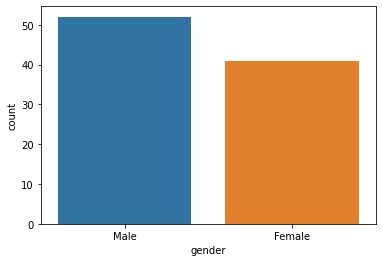

In [162]:
import seaborn as sns

sns_gender = sns.countplot(x="gender", data=train_data)
sns_gender.set_xticklabels(['Male', 'Female']);

Godine su predstavljene u sledećim opsezima: 

- 21 - 25
- 26 - 30
- 31 - 35
- 36 - 40
- 41 - 45
- 46 - 50
- 51 - 55
- 56 - 60
- 61+

Na osnovu dobijenog grafika, možemo videti da se najveći broj poznatih ličnosti nalazi u opsegu godina 31-35 i 36-40. 

Problem koji možemo uvideti jeste da određeni opsezi imaju veoma mali broj slika i takođe problem koji je već bio naveden a to je ručno određivanje godina poznatih ličnosti.

[Text(0, 0, '20-25'),
 Text(0, 0, '26-30'),
 Text(0, 0, '31-35'),
 Text(0, 0, '36-40'),
 Text(0, 0, '41-45'),
 Text(0, 0, '46-50'),
 Text(0, 0, '51-55'),
 Text(0, 0, '56-60'),
 Text(0, 0, '61+')]

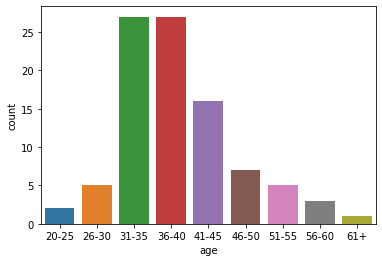

In [163]:
sns_age = sns.countplot(x="age", data=train_data)
sns_age.set_xticklabels(['20-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-55', '56-60', '61+'])

Moguće vrednosti za emocije su:

- Afraid
- Angry
- Disgusted
- Happy
- Neutral
- Sad
- Surprised

Emocije su numerisane od 0-6.

Javlja se sličan problem kao kod definisanja godina. Ne možemo sa sigurnošću odrediti raspoloženje poznate ličnosti na slici ili taj izbor može imati više ishoda, tako da će i u ovom slučaju kasnije doći do manje tačnosti rezultata.

Takođe, određene emocije imaju veoma mali broj slika što će se kasnije odraziti na rezultate.

[Text(0, 0, 'Afraid'),
 Text(0, 0, 'Angry'),
 Text(0, 0, 'Disgusted'),
 Text(0, 0, 'Happy'),
 Text(0, 0, 'Neutral'),
 Text(0, 0, 'Sad'),
 Text(0, 0, 'Surprised')]

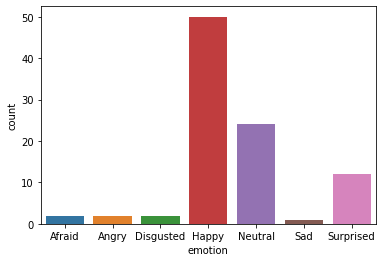

In [164]:
sns_emotion = sns.countplot(x="emotion", data=train_data)
sns_emotion.set_xticklabels(['Afraid', 'Angry', 'Disgusted', 'Happy', 'Neutral', 'Sad', 'Surprised'])

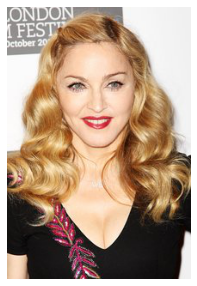

(317, 214, 3)


In [165]:
from skimage.io import imread
from skimage.color import rgb2gray, gray2rgb
from skimage.transform import resize
from PIL import Image
import cv2

#Prikaz jedne fotografije iz trening seta
plt.figure(figsize=(5,5))
example_img_url = '/content/data/train/madonna/httpiamediaimdbcomimagesMMVBMTANDQNTAxNDVeQTJeQWpwZBbWUMDIMjQOTYVUXCRALjpg.jpg'
image = imread(example_img_url)
plt.imshow(image), plt.axis('off')
plt.show()
print(image.shape)


S obzirom da nakon učitavanja slike za primer, možemo videti da se na slici ne nalazi samo lice već, u kasnijem procesu će morati biti koriščena funkcija "extract_face", gde će se za prosleđenu fotografiju primenom biblioteke "MTCNN" izvući samo lice sa fotografije, i slika će biti transformisana na prosleđenu veličinu.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


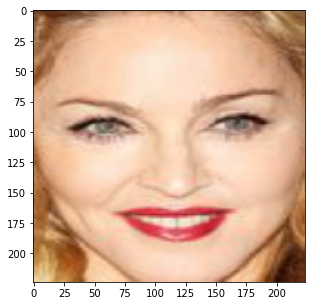

In [166]:
!pip install mtcnn
import mtcnn
from mtcnn.mtcnn import MTCNN

def extract_face(image_file, required_size=(224, 224)):
    # Učitavanje fotografije
    image = imread(image_file)
    if len(image.shape) < 3: image = gray2rgb(image) 
    else: image = image[...,:3]
    # Kreiranje detektora
    detector = MTCNN()
    # Detektovanje lica na ulaznoj fotografiji
    results = detector.detect_faces(image)
    # Ekstraktovanje graničnog okvira sa lica
    x1, y1, width, height = results[0]['box']
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height
    # Ekstraktovanje lica
    face = image[y1:y2, x1:x2]
    # Promena veličine piksela u veličinu modela
    return resize(face, required_size)

face = extract_face(example_img_url)
plt.figure(figsize=(5,5))
plt.imshow(face)
plt.show()

# Treniranje modela

Nakon učitavanja svih fotografija i analiziranja seta podataka, sledi treniranje modela. Radi boljih rezultata, za svaku od potrebnih detekcija biće kreiran poseban model.

Najpre ćemo kreirati metodu za učitavanje slika i određene kolone.

In [167]:
#Učitavanje slika i odgovarajuće kolone koja je prosleđena
def get_images_and_labels(dataset, column_name, image_size):
  data = []
  for index, row in dataset.iterrows():
      extracted_face = extract_face(row.image_path, image_size)
      #Učitavanje određene detektovane slike lica, i vrednosti kolone za tu sliku
      label = dataset[dataset['image_path']==row.image_path][column_name].values[0]
      data.append([extracted_face, label])
      #print(row.image_path)
      #print(label)
  return data

# Detekcija godina

Prvi model koji se kreira biće model za detekciju godina.

Za izradu ovog modela biće korišćen VGG16, konvolucijska neuronska mreža. Konvolucijska neuronska mreža ima jedan input sloj, jedan output sloj, i skrivene slojeve. VGG16 mreža je trenirana na ImageNet bazi podataka. Sastoji se od 16 konvolucijskih slojeva. 

Kao što je gore napomenuto, ovo je pretrained model, kako bi omogućio bolje rezultate za manje setove podataka.

Najpre kreiramo dva niza gde ćemo smestiti slike za treniranje i validaciju. Učitavamo godine kroz kolonu i slike se smeštaju u odgovarajući format i vrši se normalizacija deljenjem sa 255, s obzirom da je opseg RGB 0-255.

In [168]:
image_size = 224
#Učitavanje slika i vrednosti godina
age_training_data = get_images_and_labels(train_data, 'age', (image_size, image_size))

X_Train = []
Y_Train = []
for img, age in age_training_data:
  X_Train.append(img)
  Y_Train.append(age)

#Reshape-ovanje slika na dimenzije 224x224 koje prihvata VGG16 i normalizacija podataka
X_Train = np.array(X_Train).reshape(-1, image_size, image_size, 3)

X_Train = X_Train / 255
Y_Train = np.array(Y_Train)

X_Train.shape

(93, 224, 224, 3)

In [169]:
#Ponavljanje postupka za učitavanje validacionih podataka
image_size = 224
age_validation_data = get_images_and_labels(val_data, 'age', (image_size, image_size))

X_Val = []
Y_Val = []
for img, age in age_validation_data:
  X_Val.append(img)
  Y_Val.append(age)

X_Val = np.array(X_Val).reshape(-1, image_size, image_size, 3)

X_Val = X_Val / 255
Y_Val = np.array(Y_Val)

X_Val.shape

(25, 224, 224, 3)

In [170]:
#!pip install tensorflow==2.7.0
from tensorflow.keras.applications.vgg16 import VGG16

# Učitavanje VGG16 modela
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(image_size, image_size, 3))
base_model.trainable = False

# Prikaz modela bez dodatnih slojeva
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3134 (InputLayer)     [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [2]:
from tensorflow.keras import layers, models

flatten_layer = layers.Flatten()
dense_layer = layers.Dense(128, activation='relu')
prediction_layer = layers.Dense(9, activation='softmax')

#Dodavanje dodatnih slojeva na gore prikazani model, kao i poslednjeg sloja Dense 9, koji označava da postoji 9 mogućih kategorija za opsege godina.
model_age = models.Sequential([
    base_model,
    flatten_layer,
    dense_layer,
    prediction_layer
])

model_age.summary()

NameError: ignored

In [172]:
from tensorflow.keras.utils import to_categorical

#Kategorizovanje Y vrednosti na broj mogućih kategorija
Y_Train = to_categorical(Y_Train, 9)
Y_Val = to_categorical(Y_Val, 9)

Potrebno je da se izvrši treniranje modela.

Što se tiče hiperparametara, za optimizator je korišćen Adam optimizator, dok su za Learning rate vršene razne izmene dok se nije došlo do najboljeg rezultata.

Takođe je korišćen EarlyStopping u odnosu na val accuracy.

In [1]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

#Podešavanje i treniranje modela
model_age.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

early_stopping = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)

#Treniranje modela i pamćenje procesa treniranja radi kasnijeg grafičkog prikaza treniranja kroz epohe
history = model_age.fit(X_Train, Y_Train, validation_data=(X_Val, Y_Val), epochs=10, callbacks=[early_stopping])

NameError: ignored

Rezultati treniranja su veoma loši, najverovatnije zbog malog broja podataka, nedovoljno preciznog dodeljivanja informacija o broju godina, kao i malog broja slika za određene opsege godina, kao što je gore navedeno.

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model age accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Detekcija emocija

Naredni model koji se kreira biće model za detekciju emocija.

Za problem detekcije emocija dobre rezultate daje model ResNet50. ResNet50 mreža je takođe trenirana na ImageNet bazi podataka. Sastoji se od 50 slojeva. Kao što je gore napomenuto, ovo je takođe pretrained model, kako bi omogućio bolje rezultate za manje setove podataka. 

Najpre kreiramo dva niza gde ćemo smestiti slike za treniranje i validaciju. Učitavamo emocije kroz kolonu i slike se smeštaju u odgovarajući format i vrši se normalizacija deljenjem sa 255, s obzirom da je opseg RGB 0-255.

In [ ]:
image_size = 128
emotion_training_data = get_images_and_labels(train_data, 'emotion', (image_size, image_size))

X_Train = []
Y_Train = []
for img, emotion in emotion_training_data:
  X_Train.append(img)
  Y_Train.append(emotion)

X_Train = np.array(X_Train).reshape(-1, image_size, image_size, 3)

X_Train = X_Train / 255
Y_Train = np.array(Y_Train)

X_Train.shape

In [ ]:
image_size = 128
emotion_validation_data = get_images_and_labels(val_data, 'emotion', (image_size, image_size))

X_Val = []
Y_Val = []
for img, emotion in emotion_validation_data:
  X_Val.append(img)
  Y_Val.append(emotion)

X_Val = np.array(X_Val).reshape(-1, image_size, image_size, 3)

X_Val = X_Val / 255
Y_Val = np.array(Y_Val)

X_Val.shape

In [ ]:
#Učitavanje ResNet50 modela
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
import tensorflow as tf

base_model= tf.keras.applications.ResNet50(include_top=False,
                   weights='imagenet',
                   input_shape=(image_size, image_size, 3),
                   pooling='avg')

for layer in base_model.layers:
        layer.trainable=False

In [ ]:
flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(256, activation='relu')
dense_layer_2 = layers.Dense(256, activation='relu')
prediction_layer = layers.Dense(7, activation='softmax')

#Definisanje 7 izlaznih mogućnosti

model_emotion = models.Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])

model_emotion.summary()

In [ ]:
Y_Train = to_categorical(Y_Train, 7)
Y_Val = to_categorical(Y_Val, 7)

In [ ]:
#Treniranje modela
model_emotion.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

early_stopping = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)

history = model_emotion.fit(X_Train, Y_Train, validation_data=(X_Val, Y_Val), epochs=20, callbacks=[early_stopping])

Model za detekciju emocija je dao ne tako dobar rezultat, gde Accuracy iznosi 0.5376.
Ovakvom rezultatu je prethodio mali broj slika i nedovoljna preciznost pri ručnom dodeljivanju emocija.

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model emotion accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Detekcija pola

Naredni model jeste model za detekciju pola.

Za problem detekcije pola dobre rezultate takođe daje model ResNet50, te su određeni koraci slični kao kod modela za detekciju emocija.

Najpre kreiramo dva niza gde ćemo smestiti slike za treniranje i validaciju. Učitavamo pol kroz kolonu i slike se smeštaju u odgovarajući format i vrši se normalizacija deljenjem sa 255, s obzirom da je opseg RGB 0-255.

In [ ]:
image_size = 128
gender_training_data = get_images_and_labels(train_data, 'gender', (image_size, image_size))

X_Train = []
Y_Train = []
for img, gender in gender_training_data:
  X_Train.append(img)
  Y_Train.append(gender)

X_Train = np.array(X_Train).reshape(-1, image_size, image_size, 3)

X_Train = X_Train / 255
Y_Train = np.array(Y_Train)

X_Train.shape

In [ ]:
image_size = 128
gender_validation_data = get_images_and_labels(val_data, 'gender', (image_size, image_size))

X_Val = []
Y_Val = []
for img, gender in gender_validation_data:
  X_Val.append(img)
  Y_Val.append(gender)

X_Val = np.array(X_Val).reshape(-1, image_size, image_size, 3)

X_Val = X_Val / 255
Y_Val = np.array(Y_Val)

X_Val.shape

In [ ]:
#Učitavanje ResNet50 modela, prosleđivanje veličine slika, koje su o ovom slučaju 128x128
base_model = tf.keras.applications.ResNet50(include_top=False,
                   weights='imagenet',
                   input_shape=(image_size, image_size, 3),
                   pooling='avg')

for layer in base_model.layers:
        layer.trainable=False

In [ ]:
flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(256, activation='relu')
dense_layer_2 = layers.Dense(256, activation='relu')
prediction_layer = layers.Dense(2, activation='softmax')

#Kreiranje modela dodavanjem dodatnih slojeva, i podešavanje poslednjog sloja na dve vrednosti
model_gender = models.Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])

model_gender.summary()

In [ ]:
Y_Train = to_categorical(Y_Train, 2)
Y_Val = to_categorical(Y_Val, 2)

In [ ]:
#Dodavanje optimizera, early stopping-a i treniranje modela
model_gender.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

early_stopping = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)

history = model_gender.fit(X_Train, Y_Train, validation_data=(X_Val, Y_Val), epochs=20, callbacks=[early_stopping])

Rezultati modela za detekciju pola su dali malo bolje ali ne toliko značajne rezultate, gde je Val_accuracy 0.60, dok Accuracy iznosi 0.5591.

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model gender accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Testiranje

U narednom delu biće istestirani gore kreirani modeli, kako bi se utvrdilo koliko dobro vrše detekciju nad slikama koje do sad modeli nisu videli. Kao podloga za iscrtavanje okvira i detektovanja lica, korišćen je primer iz rada [4].

In [ ]:
import sys
import dlib
from glob import glob

k = width = 8
margin = 0.4
img_size = 128

# Funkcija za iscrtavanje graničnih okvira sa oznakom godina/pola
def draw_label(image, point, label, font=cv2.FONT_HERSHEY_SIMPLEX, font_scale=1.0, thickness=2):
    size = cv2.getTextSize(label, font, font_scale, thickness)[0]
    x, y = point
    
    if prediction_gender_index:
        cv2.rectangle(image, (x, y - size[1]), (x + size[0], y), (255, 0, 0), cv2.FILLED)
    else:
        cv2.rectangle(image, (x, y - size[1]), (x + size[0], y), (30, 144, 255), cv2.FILLED)

    cv2.putText(image, label, point, font, font_scale, (255, 255, 255), thickness, lineType=cv2.LINE_AA)

# Frontalni detektor lica za otkrivanje i izdvajanje lica sa ulaznih fotografija
detector = dlib.get_frontal_face_detector()

plt.figure(figsize=(14,7))
plt.subplots_adjust(0,0,1,1,0.05,0.05)
j = 1


#Definisanje 2 slike za testiranje
test_list = ['https://img.freepik.com/free-photo/portrait-white-man-isolated_53876-40306.jpg', 
             'https://previews.123rf.com/images/wisiel/wisiel1302/wisiel130200034/17625502-woman-with-angry-face-on-white-background.jpg']


#Definisanje mogućih opcija za emocije i opsege godina
emotions_list = ['Afraid', 'Angry', 'Disgusted', 'Happy', 'Neutral', 'Sad', 'Surprised']
ages_list = ['20-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-55', '56-60', '61+']


for img_file in test_list:
  img = imread(img_file)
  img_h, img_w, _ = np.shape(img)
  r = 640 / max(img_h, img_w)
  img = cv2.resize(img, (int(img_w * r), int(img_h * r)))

  # Detekcija lica korišćenjem dlib detektora
  detected = detector(img, 0) #0)

  faces = np.empty((len(detected), img_size, img_size, 3))
      
  if len(detected) > 0:
      for i, d in enumerate(detected):
          x1, y1, x2, y2, w, h = d.left(), d.top(), d.right() + 1, d.bottom() + 1, d.width(), d.height()
          xw1 = max(int(x1 - margin * w), 0)
          yw1 = max(int(y1 - margin * h), 0)
          xw2 = min(int(x2 + margin * w), img_w - 1)
          yw2 = min(int(y2 + margin * h), img_h - 1)
          faces[i, :, :, :] = cv2.resize(img[yw1:yw2 + 1, xw1:xw2 + 1, :], (img_size, img_size))


# Predikcija godina, pola i emocija detektovanih lica
      prediction_gender = model_gender.predict(np.asarray(faces))
      prediction_gender_index = np.argmax(prediction_gender)

      if prediction_gender_index:
          cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
      else:
          cv2.rectangle(img, (x1, y1), (x2, y2), (30, 144, 255), 2)

      prediction_emotion = model_emotion.predict(np.asarray(faces))
      prediction_emotion_index = np.argmax(prediction_emotion)

      image_size = 224
      faces = np.empty((len(detected), image_size, image_size, 3))
      faces[0, :, :, :] = cv2.resize(img[yw1:yw2 + 1, xw1:xw2 + 1, :], (image_size, image_size))
      prediction_age = model_age.predict(np.asarray(faces))
      prediction_age_index = np.argmax(prediction_age)

      # Iscrtavanje rezultata
      for i, d in enumerate(detected):      
        label = "{} {} {}".format(ages_list[prediction_age_index], "Male" if prediction_gender_index == 0 else "Female", emotions_list[prediction_emotion_index])  
        draw_label(img, (d.left(), d.top()), label)

  plt.subplot(1,2,j), plt.imshow(img), plt.axis('off')
  j += 1

plt.show()





Rezultati za prvu sliku su dobri, gde je otprilike pogođen opseg godina, emocija, dok je pol skroz tačan. Međutim, na drugoj slici, iz nekog razloga, pol je potpuno promašen, dok za emocije i godine možemo reći da su približno tačni.

# Zaključak

Detekcija godina, pola i emocija nije bio lak zadatak, ali je bio izazovan i moglo se naučiti dosta iz njega. 
Prvobitni potencijalni problem koji je uočen je na kraju i dao svoj udeo u rezultatima i taj mali broj slika bez opisa i bilo kakvih informacija o samim godinama, polu i emocijama poznatih ličnosti sa slika je predstavljao veliki problem na kraju testiranja. 
To možemo uvideti u totalnom promašaju pola na drugoj slici iako je model za detekciju pola imao najbolje rezultate prilikom treniranja.
Najveći izazovi su bili ručno dodavanje informacija o poznatim ličnostima, biranje najpogodnijih modela u cilju dobijanja najboljih rezultata.

# Reference


[1] Adenowo, A. A., & Adewole, A. O. (2020). Performance Evaluation of Deep Learning Method for Age, Gender and Emotion Recognition Tasks.

[2] https://keras.io/

[3] Theckedath, D., & Sedamkar, R. R. (2020).Detecting affect states using VGG16, ResNet50 and SE-ResNet50 networks. SN Computer Science, 1(2), 1-7.

[4] Vežbe 11 iz predmeta Principi prezentacije i prepoznavanje oblika

[5] Dataset: https://drive.google.com/file/d/1vIyvXtTerVUWVuRRPGcFgXTkgUgM-d9U/view?usp=sharing